In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = sym.symbols('x')
m = sym.symbols('m')
k, omega = sym.symbols('k, omega')

C1, C2 = sym.symbols('C1 C2')
kappa, L, k_s, eta_s, T = sym.symbols('kappa L k_s eta_s T')
W = sym.Function('W')(x)

ODE = sym.Eq(W.diff(x, 2) + kappa**2*W, 0)
display(ODE)

W = C1 * sym.sin(kappa*x) + C2 * sym.cos(kappa*x)

Eq(kappa**2*W(x) + Derivative(W(x), (x, 2)), 0)

In [3]:
W_m = sym.Function('W_m')(x,m)
W_m = W.subs(x, x-m*L)*sym.exp(-1j*k*m*L)
display(W_m)

(C1*sin(kappa*(-L*m + x)) + C2*cos(kappa*(-L*m + x)))*exp(-1.0*I*L*k*m)

In [4]:
eq1 = sym.Eq(W_m.subs(m, m), W_m.subs(m, m+1))
eq2 = sym.Eq(-W_m.diff(x).subs(m, m) + W_m.diff(x).subs(m, m+1), k_s/T * W_m.subs(m,m))

display(eq1)
display(eq2)

eqns = [eq1.expand(), eq2.expand()]
M = sym.linear_eq_to_matrix(eqns, [C1, C2])[0]
display(M)

Eq((C1*sin(kappa*(-L*m + x)) + C2*cos(kappa*(-L*m + x)))*exp(-1.0*I*L*k*m), (C1*sin(kappa*(-L*(m + 1) + x)) + C2*cos(kappa*(-L*(m + 1) + x)))*exp(-1.0*I*L*k*(m + 1)))

Eq(-(C1*kappa*cos(kappa*(-L*m + x)) - C2*kappa*sin(kappa*(-L*m + x)))*exp(-1.0*I*L*k*m) + (C1*kappa*cos(kappa*(-L*(m + 1) + x)) - C2*kappa*sin(kappa*(-L*(m + 1) + x)))*exp(-1.0*I*L*k*(m + 1)), k_s*(C1*sin(kappa*(-L*m + x)) + C2*cos(kappa*(-L*m + x)))*exp(-1.0*I*L*k*m)/T)

Matrix([
[                                                               -exp(-1.0*I*L*k*m)*sin(L*kappa*m - kappa*x) + exp(-1.0*I*L*k)*exp(-1.0*I*L*k*m)*sin(L*kappa*m + L*kappa - kappa*x),                                                                 exp(-1.0*I*L*k*m)*cos(L*kappa*m - kappa*x) - exp(-1.0*I*L*k)*exp(-1.0*I*L*k*m)*cos(L*kappa*m + L*kappa - kappa*x)],
[-kappa*exp(-1.0*I*L*k*m)*cos(L*kappa*m - kappa*x) + kappa*exp(-1.0*I*L*k)*exp(-1.0*I*L*k*m)*cos(L*kappa*m + L*kappa - kappa*x) + k_s*exp(-1.0*I*L*k*m)*sin(L*kappa*m - kappa*x)/T, -kappa*exp(-1.0*I*L*k*m)*sin(L*kappa*m - kappa*x) + kappa*exp(-1.0*I*L*k)*exp(-1.0*I*L*k*m)*sin(L*kappa*m + L*kappa - kappa*x) - k_s*exp(-1.0*I*L*k*m)*cos(L*kappa*m - kappa*x)/T]])

In [5]:
xi, K_s = sym.symbols('xi, K_s')

disp_eq = M.det().expand()
disp_eq = disp_eq.subs(k_s/T, K_s).subs(sym.exp(-1j*k*L), xi)
disp_eq = disp_eq/kappa
disp_eq = disp_eq/sym.exp(-2j*L*k*m)

In [6]:
disp_eq.simplify()

-K_s*xi*sin(L*kappa)/kappa - 2*xi*cos(L*kappa) + xi**2.0 + 1

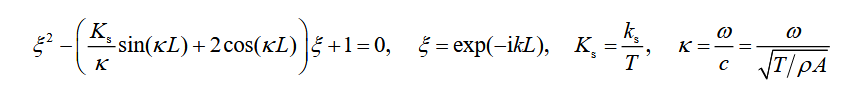

In [7]:
values = {L:10, K_s:4E3/15E3}

eq = sym.Eq(disp_eq.subs(values), 0)
sol = sym.solve(eq, xi)


In [8]:
display(sol[0])
display(sol[1])

0.0666666666666667*(15.0*kappa*cos(10.0*kappa) - 15.0*sqrt(kappa**2*cos(10.0*kappa)**2 - kappa**2 + 0.133333333333333*kappa*sin(20.0*kappa) - 0.0177777777777778*cos(10.0*kappa)**2 + 0.0177777777777778) + 2.0*sin(10.0*kappa))/kappa

0.0666666666666667*(15.0*kappa*cos(10.0*kappa) + 15.0*sqrt(kappa**2*cos(10.0*kappa)**2 - kappa**2 + 0.133333333333333*kappa*sin(20.0*kappa) - 0.0177777777777778*cos(10.0*kappa)**2 + 0.0177777777777778) + 2.0*sin(10.0*kappa))/kappa

In [27]:
xi1 = sol[0]
xi2 = sol[1]

k1 = 1j*sym.log(xi1)/(L)
k2 = 1j*sym.log(xi2)/(L)

display(xi1)

xi1_lambda = sym.lambdify(kappa, xi1)
xi2_lambda = sym.lambdify(kappa, xi2)

k1_lambda = sym.lambdify(kappa, k1.subs(values))
k2_lambda = sym.lambdify(kappa, k2.subs(values))

0.0666666666666667*(15.0*kappa*cos(10.0*kappa) - 15.0*sqrt(kappa**2*cos(10.0*kappa)**2 - kappa**2 + 0.133333333333333*kappa*sin(20.0*kappa) - 0.0177777777777778*cos(10.0*kappa)**2 + 0.0177777777777778) + 2.0*sin(10.0*kappa))/kappa

<lambdifygenerated-5>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.0666666666666667*(15.0*kappa*cos(10.0*kappa) - 15.0*sqrt(kappa**2*cos(10.0*kappa)**2 - kappa**2 + 0.133333333333333*kappa*sin(20.0*kappa) - 0.0177777777777778*cos(10.0*kappa)**2 + 0.0177777777777778) + 2.0*sin(10.0*kappa))/kappa
<lambdifygenerated-6>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.0666666666666667*(15.0*kappa*cos(10.0*kappa) + 15.0*sqrt(kappa**2*cos(10.0*kappa)**2 - kappa**2 + 0.133333333333333*kappa*sin(20.0*kappa) - 0.0177777777777778*cos(10.0*kappa)**2 + 0.0177777777777778) + 2.0*sin(10.0*kappa))/kappa


Text(0, 0.5, 'xi')

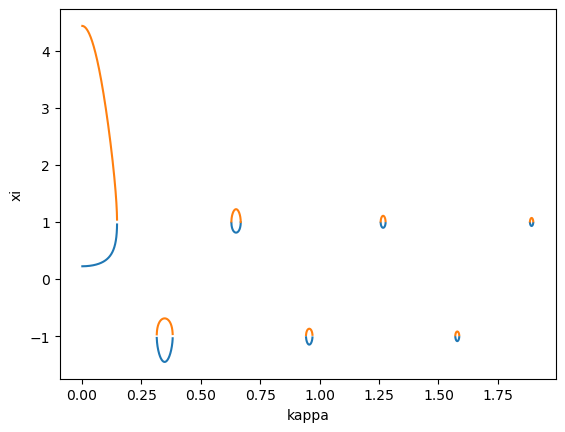

In [28]:
kappa_values = np.linspace(0.001, 2, 10000)

plt.plot(kappa_values, xi1_lambda(kappa_values), label='xi1')
plt.plot(kappa_values, xi2_lambda(kappa_values), label='xi2')
plt.xlabel('kappa')
plt.ylabel('xi')

<lambdifygenerated-7>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.1*1j*log(0.0666666666666667*(15.0*kappa*cos(10.0*kappa) - 15.0*sqrt(kappa**2*cos(10.0*kappa)**2 - kappa**2 + 0.133333333333333*kappa*sin(20.0*kappa) - 0.0177777777777778*cos(10.0*kappa)**2 + 0.0177777777777778) + 2.0*sin(10.0*kappa))/kappa)
<lambdifygenerated-7>:2: RuntimeWarning: invalid value encountered in log
  return 0.1*1j*log(0.0666666666666667*(15.0*kappa*cos(10.0*kappa) - 15.0*sqrt(kappa**2*cos(10.0*kappa)**2 - kappa**2 + 0.133333333333333*kappa*sin(20.0*kappa) - 0.0177777777777778*cos(10.0*kappa)**2 + 0.0177777777777778) + 2.0*sin(10.0*kappa))/kappa)
<lambdifygenerated-8>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.1*1j*log(0.0666666666666667*(15.0*kappa*cos(10.0*kappa) + 15.0*sqrt(kappa**2*cos(10.0*kappa)**2 - kappa**2 + 0.133333333333333*kappa*sin(20.0*kappa) - 0.0177777777777778*cos(10.0*kappa)**2 + 0.0177777777777778) + 2.0*sin(10.0*kappa))/kappa)
<lambdifygenerated-8

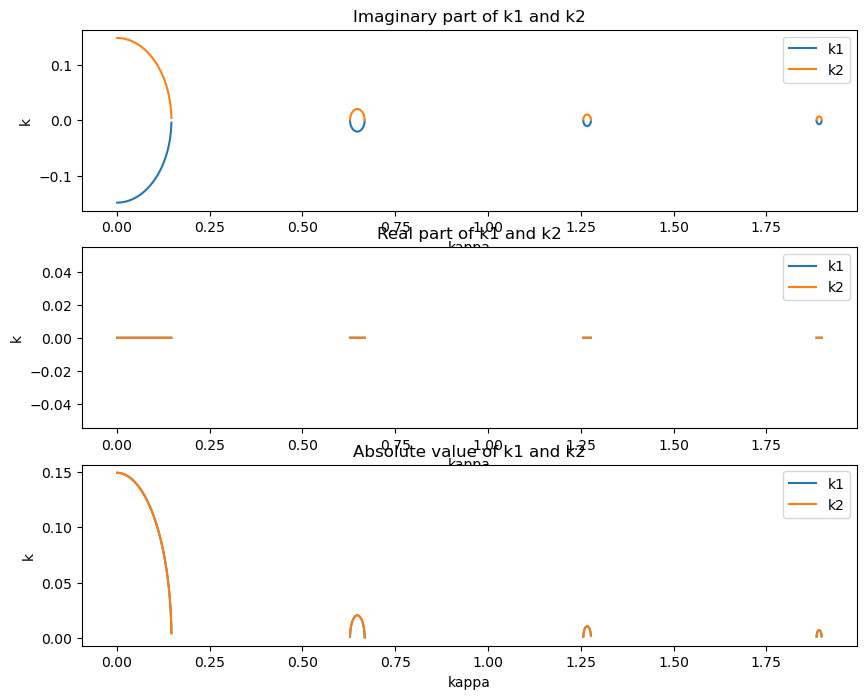

In [33]:
kappa_values = np.linspace(0.001, 2, 10000)

fig, ax = plt.subplots(3, 1, figsize=(10, 8))
ax[0].plot(kappa_values, np.imag(k1_lambda(kappa_values)), label='k1')
ax[0].plot(kappa_values, np.imag(k2_lambda(kappa_values)), label='k2')
ax[0].set_xlabel('kappa')
ax[0].set_ylabel('k')
ax[0].legend()
ax[0].set_title('Imaginary part of k1 and k2');

ax[1].plot(kappa_values, np.real(k1_lambda(kappa_values)), label='k1')
ax[1].plot(kappa_values, np.real(k2_lambda(kappa_values)), label='k2')
ax[1].set_xlabel('kappa')
ax[1].set_ylabel('k')
ax[1].legend()
ax[1].set_title('Real part of k1 and k2')

ax[2].plot(kappa_values, np.abs(k1_lambda(kappa_values)), label='k1')
ax[2].plot(kappa_values, np.abs(k2_lambda(kappa_values)), label='k2')
ax[2].set_xlabel('kappa')
ax[2].set_ylabel('k');
ax[2].legend()
ax[2].set_title('Absolute value of k1 and k2');